<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**데이터 로드 및 전처리**
---
먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_mean = train_data.mean(axis = 0)
train_std = train_data.std(axis = 0)
test_mean = test_data.mean(axis = 0)
test_std = test_data.std(axis = 0)

train_data -= train_mean
test_data -= test_mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data /= train_std
test_data /= test_std

##**모델 구성 및 컴파일**
---
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성합니다.

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 회귀 예측을 위해 활성화 함수 없이 하나의 유닛을 가진 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mse',       # 평균 제곱 오차를 손실 함수로 사용
              metrics=['mae'])  # 평균 절대 오차를 평가 지표로 사용

# 모델 요약 출력 (선택사항)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


##**모델 학습**
---
epochs와 batch size는 60, 8로 하여 모델을 학습합니다.

In [11]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.2,
                                                  random_state=123)


history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=8,
                    validation_data=(x_val, y_val))

Epoch 1/60
41/41 [==============================] - 0s 7ms/step - loss: 8.5119 - mae: 2.0695 - val_loss: 6.8103 - val_mae: 2.0417
Epoch 2/60
41/41 [==============================] - 0s 8ms/step - loss: 8.2130 - mae: 2.0466 - val_loss: 6.1769 - val_mae: 1.9167
Epoch 3/60
41/41 [==============================] - 1s 13ms/step - loss: 8.0955 - mae: 2.0288 - val_loss: 6.4169 - val_mae: 2.0020
Epoch 4/60
41/41 [==============================] - 0s 11ms/step - loss: 7.5786 - mae: 1.9484 - val_loss: 6.6654 - val_mae: 2.0977
Epoch 5/60
41/41 [==============================] - 1s 14ms/step - loss: 7.6977 - mae: 1.9744 - val_loss: 6.7871 - val_mae: 2.0978
Epoch 6/60
41/41 [==============================] - 1s 14ms/step - loss: 7.6359 - mae: 2.0013 - val_loss: 6.0665 - val_mae: 1.9365
Epoch 7/60
41/41 [==============================] - 0s 8ms/step - loss: 7.4199 - mae: 1.9571 - val_loss: 6.2475 - val_mae: 1.9662
Epoch 8/60
41/41 [==============================] - 0s 9ms/step - loss: 7.3739 - mae: 

<ipython-input-14-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


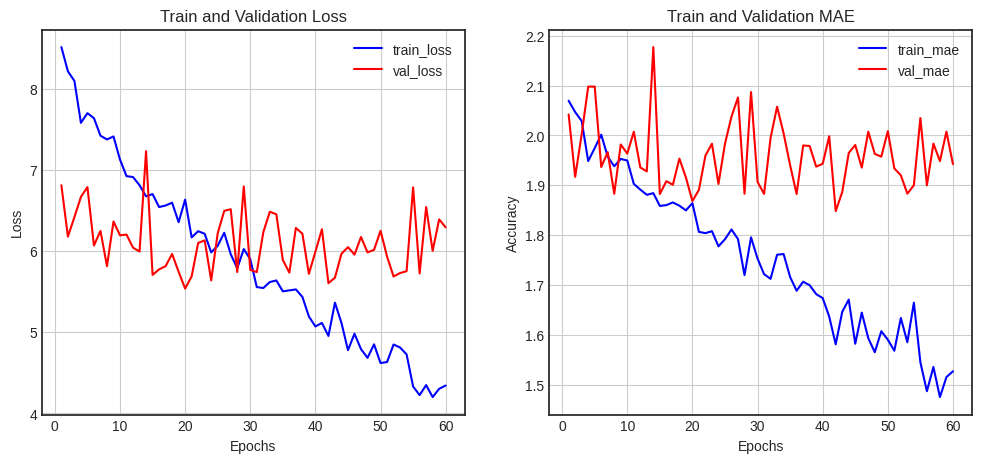

In [14]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##**모델 평가 및 예측**
---
테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [15]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 15.4739 - mae: 2.6095


[15.473941802978516, 2.609539747238159]